In [43]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(); sns.set_style('dark')



In [53]:
img = cv2.imread('data/img1.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


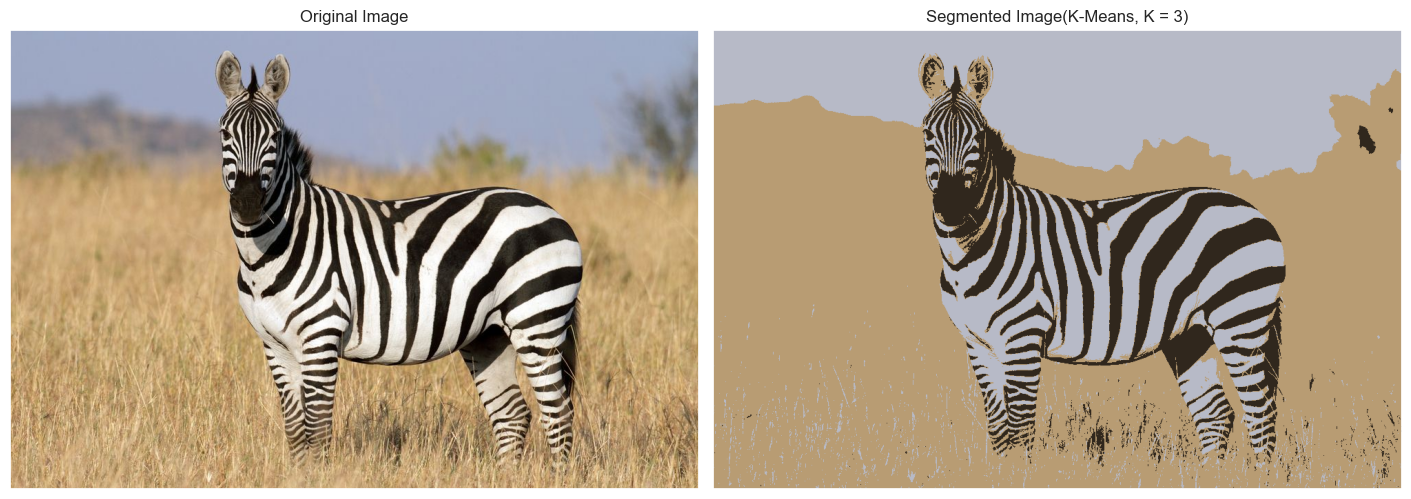

In [54]:

# cv2.kmeans() only takes float32, so convert img to float32
Z = img.reshape((-1,3))
Z = np.float32(Z)

# Define criteria, number of clusters(K) and apply kmeans()
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 3
ret,label,center=cv2.kmeans(Z,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)

# Now convert back into uint8, and make original image
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((img.shape))

# Plot the images
images = [img, res2]
titles = ['Original Image', 'Segmented Image(K-Means, K = 3)']
plt.figure(figsize=(14, 6), constrained_layout=True)
for i in range(2):
    plt.subplot(1,2,i+1),plt.imshow(images[i])
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()
